In [1]:
import pandas as pd
import numpy as np
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("data/movies.csv")
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
ratings = pd.read_csv("data/ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


## Dealing with Duplicate Data

In [4]:
duplicates = movies[movies.duplicated(subset=['title'], keep=False)]
sorted_duplicates = pd.DataFrame(duplicates.sort_values("title"))

sorted_duplicates

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [5]:
duplicateIds = [6003, 26958, 32600, 168358, 64997]
movies = movies[~movies["movieId"].isin(duplicateIds)]

## Graphing a Random Sample Network:

In [6]:
merged_ratings = pd.merge(ratings, movies, on='movieId', how='inner')

In [7]:
np.random.seed(123)
random_indices = np.random.randint(0, len(merged_ratings), 500)
random_ratings = merged_ratings.iloc[random_indices]

In [8]:
G = nx.Graph()

In [9]:
user_nodes = set(random_ratings["userId"])
movie_nodes = set(random_ratings["title"])
edges = [(int(row['userId']), (row['title'])) for _, row in random_ratings.iterrows()]

G.add_nodes_from(user_nodes, bipartite=0, color ="red")
G.add_nodes_from(movie_nodes, bipartite=1, color = "blue")
G.add_edges_from(edges)

In [10]:
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

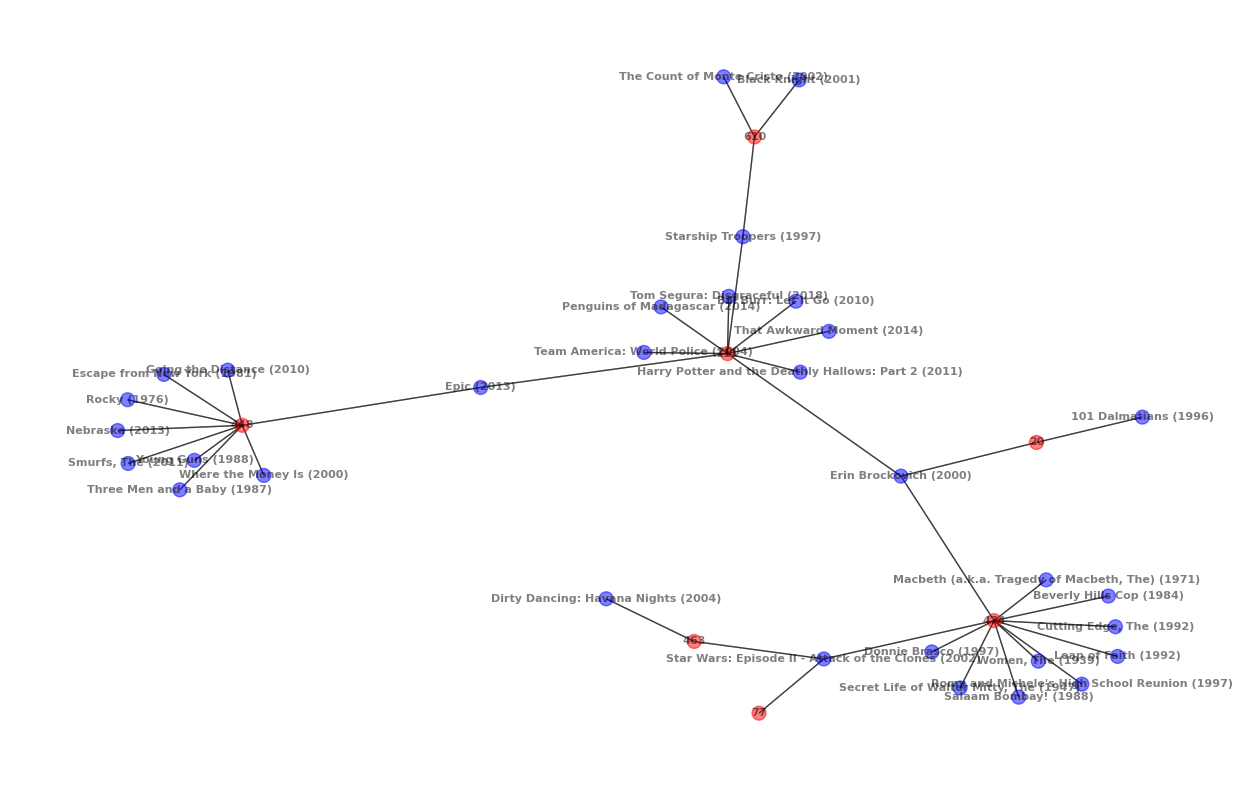

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))

pos = nx.spring_layout(subgraph, seed=42, scale=2)  # Adjust the 'scale' parameter to spread out the graph

# Set node colors
node_colors = [subgraph.nodes[node]['color'] for node in subgraph.nodes]

# Draw the subgraph with smaller nodes, smaller text, and visible edges
nx.draw(subgraph, pos, with_labels=True, font_size=8, font_weight='bold', node_color=node_colors, node_size=100, alpha=0.5)

# Draw edges separately to make them more visible
nx.draw_networkx_edges(subgraph, pos, width=1.0, alpha=0.5)

plt.show()

## Colaborative Filtering Matrix

In [12]:
merged_ratings = pd.merge(ratings, movies, on='movieId', how='inner')
sparse_collabfitering = merged_ratings.pivot(index = "userId", columns ="title", values = "rating")
sparse_collabfitering.head(10)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [13]:
sparse_matrix = csr_matrix(sparse_collabfitering)

In [14]:
n = len(sparse_collabfitering)

user_similarity = np.zeros((n, n))

In [15]:
for i in range(n):
    user1_movies = sparse_collabfitering.iloc[i, :].notna().to_numpy()
    
    for k in range(i+1, n):
        user2_movies = sparse_collabfitering.iloc[k, :].notna().to_numpy()

        # Calculate intersection using bitwise AND
        intersection_index = user1_movies & user2_movies

        # Check if there are common movies
        if np.sum(intersection_index) >= 10:
            common_movies = sparse_collabfitering.iloc[i, intersection_index].values
            other_user_movies = sparse_collabfitering.iloc[k, intersection_index].values
            
            user_similarity[i, k] = cosine_similarity(common_movies.reshape(1, -1), other_user_movies.reshape(1, -1))[0, 0]
            user_similarity[k, i] = user_similarity[i, k]

Our cosine similarities are between 0 and 1 becasue ratings can only be positive

In [16]:
user_simDF = pd.DataFrame(user_similarity)
user_simDF.head(20)

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0.000000,0.000000,0.0,0.932810,0.970770,0.939243,0.951037,0.978123,0.000000,0.000000,...,0.992413,0.958830,0.927490,0.954033,0.937549,0.967379,0.958247,0.956573,0.000000,0.976881
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.981042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990501
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.932810,0.000000,0.0,0.000000,0.901137,0.899828,0.945977,0.000000,0.000000,0.000000,...,0.879535,0.918902,0.912397,0.000000,0.952565,0.933792,0.913567,0.867322,0.000000,0.921235
4,0.970770,0.000000,0.0,0.901137,0.000000,0.932712,0.000000,0.943665,0.000000,0.000000,...,0.000000,0.939417,0.933872,0.954653,0.930918,0.960953,0.954314,0.928047,0.000000,0.960010
5,0.939243,0.000000,0.0,0.899828,0.932712,0.000000,0.911812,0.924762,0.000000,0.000000,...,0.000000,0.933789,0.907844,0.946856,0.964247,0.947985,0.961672,0.911192,0.965591,0.952885
6,0.951037,0.000000,0.0,0.945977,0.000000,0.911812,0.000000,0.000000,0.000000,0.846599,...,0.947692,0.961606,0.921485,0.000000,0.939982,0.931303,0.972062,0.922770,0.000000,0.935526
7,0.978123,0.000000,0.0,0.000000,0.943665,0.924762,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.935518,0.936782,0.970220,0.941692,0.967077,0.963498,0.959250,0.967007,0.966155
8,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.977616,0.000000,0.939601,0.000000,0.971806
9,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.846599,0.000000,0.000000,0.000000,...,0.886252,0.000000,0.784229,0.000000,0.933620,0.902706,0.000000,0.852762,0.000000,0.896231


In [17]:
threshold = 0.9

user_similarity_thresholded = np.where(user_similarity > threshold, 1, 0)
user_similarity_thresholded= pd.DataFrame(user_similarity_thresholded)

In [18]:
G = nx.from_pandas_adjacency(user_similarity_thresholded)
print(f"Total Edges: {len(G.edges())}")

Total Edges: 63788


In [19]:
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

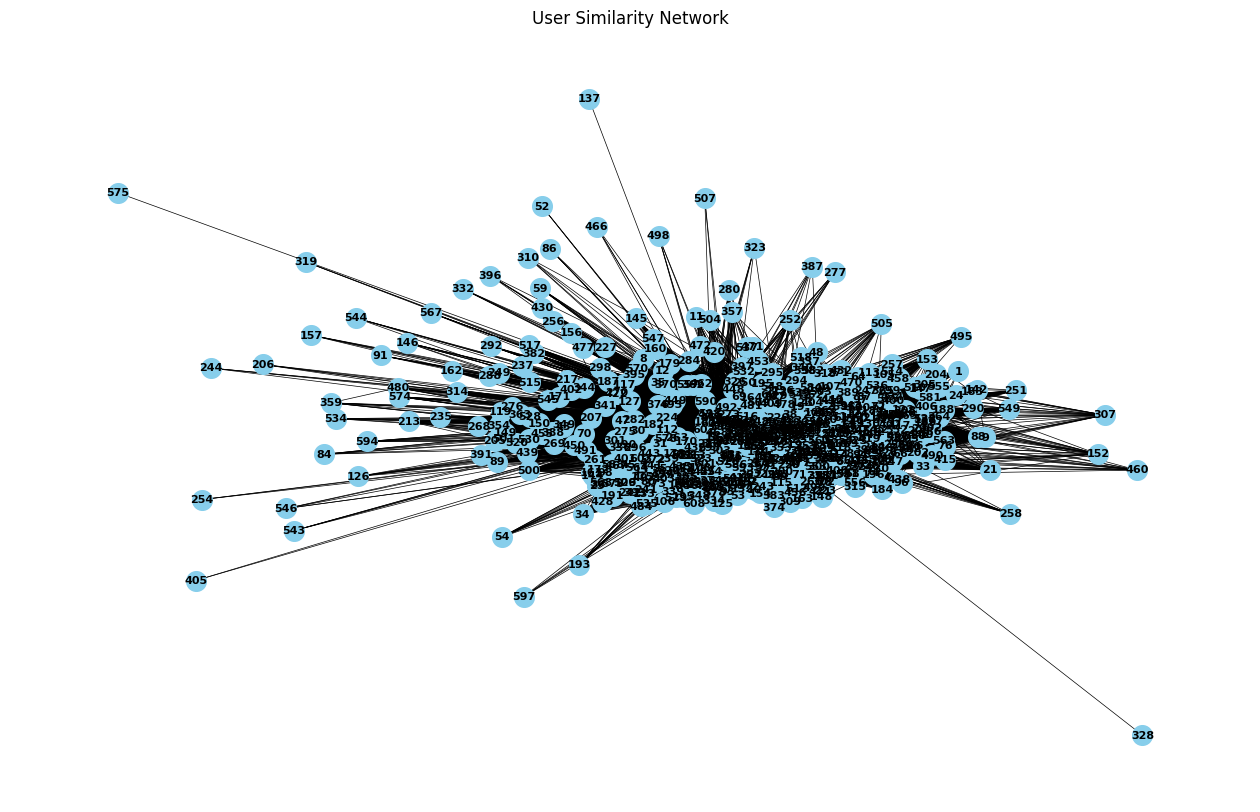

In [20]:
fig, ax = plt.subplots(figsize=(16, 10))
pos = nx.spring_layout(subgraph)

nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', font_color='black', font_size=8, edge_color='black', width=0.5)

plt.title("User Similarity Network")
plt.show()